In [84]:
# Шаг 1: Импортируем библиотеку pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

# Теперь библиотека pandas доступна для использования в вашем проекте.

In [85]:
# Выводим информацию о версиях установленных библиотек
!pip show pandas numpy seaborn matplotlib.pyplot scipy

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn, catboost
---
Name: numpy
Version: 1.21.1
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: 
Required-by: xgboost, transformers, thinc, tensorflow-cpu, tensorboard, statsmodels, spacy, seaborn, scipy, scikit-learn, pyod, pyarrow, patsy, pandas, opt-einsum, numba, matplotlib, lightgbm, Keras-Preprocessing, h5py, gensim, folium, catboost, blis
---
Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mw

### Откройте файл с данными и изучите общую информацию

**Задание 1.** Откройте файл `/datasets/calls.csv`, сохраните датафрейм в переменную `calls`.

In [86]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/calls.csv'
try:
    calls = pd.read_csv('/datasets/calls.csv', sep=',')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/calls.csv'
    calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv', sep=',')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'calls'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

**Задание 2.** Выведите первые 5 строк датафрейма `calls`.

In [87]:
# Шаг 1: Используем метод .head() для вывода первых строк DataFrame calls
calls.head()

# Этот код выведет первые 5 строк DataFrame calls, чтобы получить представление о данных.

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**Задание 3.** Выведите основную информацию для датафрейма `calls` с помощью метода `info()`.

In [88]:
# Шаг 1: Используем метод .info() для получения информации о DataFrame calls
calls.info()

# Этот код выведет подробную информацию о структуре и содержании DataFrame calls, включая типы данных, пропущенные значения и использование памяти.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Задание 4.** С помощью метода `hist()` выведите гистограмму для столбца с продолжительностью звонков. Подумайте о том, как распределены данные.

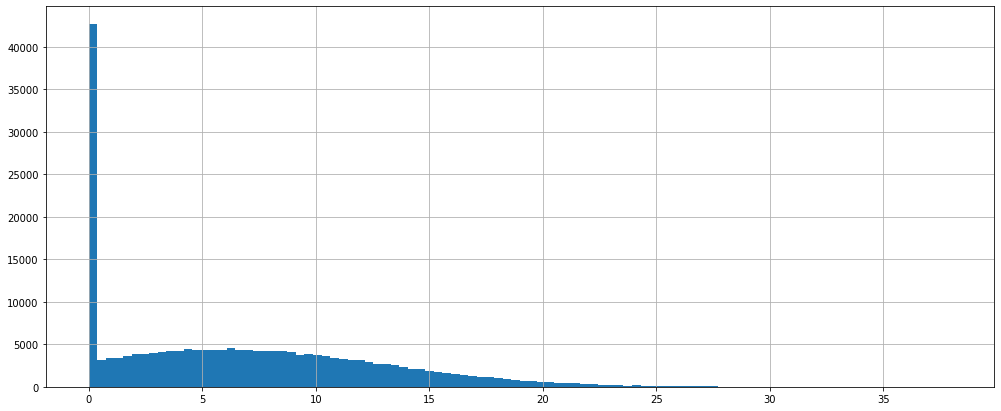

In [89]:
# Шаг 1: Используем метод .hist() для построения гистограммы
calls['duration'].hist(
    bins=100,  # Количество бинов в гистограмме
    #range=(0, 35),  # Диапазон значений на гистограмме (неактивирован)
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True  # Включаем сетку на графике
);

# Этот код построит гистограмму распределения продолжительности звонков из столбца 'duration' в DataFrame calls.
# Вы можете настроить параметры bins и range для лучшей визуализации ваших данных, если это необходимо.

**Задание 5.** Откройте файл `/datasets/internet.csv`, сохраните датафрейм в переменную `sessions`.

In [90]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/internet.csv'
try:
    sessions = pd.read_csv('/datasets/internet.csv', sep=',')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/internet.csv'
    sessions = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv', sep=',')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'sessions'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

**Задание 6.** Выведите первые 5 строк датафрейма `sessions`.

In [91]:
# Шаг 1: Используем метод .head() для вывода первых строк DataFrame sessions
sessions.head()

# Этот код выведет первые 5 строк DataFrame sessions, чтобы получить представление о данных.

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


**Задание 7.** Выведите основную информацию для датафрейма `sessions` с помощью метода `info()`. 

In [92]:
# Шаг 1: Используем метод .info() для получения информации о DataFrame sessions
sessions.info()

# Этот код выведет подробную информацию о структуре и содержании DataFrame sessions, включая типы данных, пропущенные значения и использование памяти.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Задание 8.** С помощью метода `hist()` выведите гистограмму для столбца с количеством потраченных мегабайт.

<AxesSubplot:>

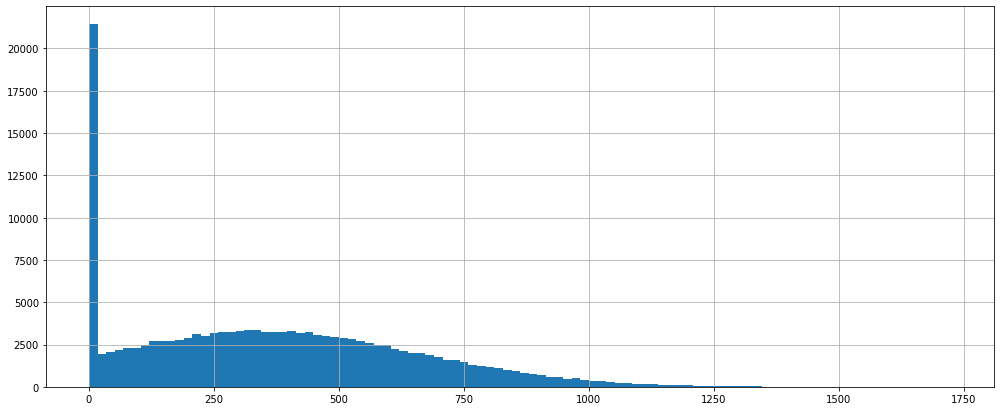

In [93]:
# Шаг 1: Используем метод .hist() для построения гистограммы
sessions['mb_used'].hist(
    bins=100,  # Количество бинов в гистограмме
    #range=(0, 35),  # Диапазон значений на гистограмме (неактивирован)
    figsize=(17, 7),  # Устанавливаем размер графика
    grid=True  # Включаем сетку на графике
)

# Этот код построит гистограмму распределения использования интернет-трафика из столбца 'mb_used' в DataFrame sessions.
# Вы можете настроить параметры bins и range для лучшей визуализации ваших данных, если это необходимо.

**Задание 9.** Откройте файл `/datasets/messages.csv`, сохраните датафрейм в переменную `messages`.

In [94]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/messages.csv'
try:
    messages = pd.read_csv('/datasets/messages.csv', sep=',')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/messages.csv'
    messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv', sep=',')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'messages'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

**Задание 10.** Выведите первые 5 строк датафрейма `messages`.

In [95]:
# Шаг 1: Используем метод .head() для вывода первых строк DataFrame messages
messages.head()

# Этот код выведет первые 5 строк DataFrame messages, чтобы получить представление о данных.

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Задание 11.** Выведите основную информацию для датафрейма `messages` с помощью метода `info()`. 

In [96]:
# Шаг 1: Используем метод .info() для получения информации о DataFrame messages
messages.info()

# Этот код выведет подробную информацию о структуре и содержании DataFrame messages, включая типы данных, пропущенные значения и использование памяти.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Задание 12.** Откройте файл `/datasets/tariffs.csv`, сохраните датафрейм в переменную `tariffs`.

In [97]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/tariffs.csv'
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/tariffs.csv'
    tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv', sep=',')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'tariffs'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

**Задание 13.** Выведите весь датафрейм `tariffs`.

In [98]:
# Шаг 1: Используем метод .head() для вывода первых строк DataFrame tariffs
tariffs.head()

# Этот код выведет первые 5 строк DataFrame tariffs, чтобы получить представление о данных.

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Задание 14.** Выведите основную информацию для датафрейма `tariffs` с помощью метода `info()`.

In [99]:
# Шаг 1: Используем метод .info() для получения информации о DataFrame tariffs
tariffs.info()

# Этот код выведет подробную информацию о структуре и содержании DataFrame tariffs, включая типы данных, пропущенные значения и использование памяти.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Задание 15.** Откройте файл `/datasets/users.csv`, сохраните датафрейм в переменную `users`.

In [100]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/users.csv'
try:
    users = pd.read_csv('/datasets/users.csv', sep=',')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/users.csv'
    users = pd.read_csv('https://code.s3.yandex.net/datasets/tariusersffs.csv', sep=',')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'users'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

**Задание 16.** Выведите первые 5 строк датафрейма `users`.

In [101]:
# Шаг 1: Используем метод .head() для вывода первых строк DataFrame users
users.head()

# Этот код выведет первые 5 строк DataFrame users, чтобы получить представление о данных.

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Задание 17.** Выведите основную информацию для датафрейма `users` с помощью метода `info()`.

In [102]:
# Шаг 1: Используем метод .info() для получения информации о DataFrame users
users.info()

# Этот код выведет подробную информацию о структуре и содержании DataFrame users, включая типы данных, пропущенные значения и использование памяти.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Подготовьте данные

**Задание 18.**  Приведите столбцы

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к новому типу с помощью метода `to_datetime()`.

In [103]:
# Шаг 1: Используем pd.to_datetime() для преобразования столбца 'reg_date' в формат даты в DataFrame 'users'
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Шаг 2: Используем pd.to_datetime() для преобразования столбца 'churn_date' в формат даты в DataFrame 'users'
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

# Шаг 3: Используем pd.to_datetime() для преобразования столбца 'call_date' в формат даты в DataFrame 'calls'
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# Шаг 4: Используем pd.to_datetime() для преобразования столбца 'message_date' в формат даты в DataFrame 'messages'
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# Шаг 5: Используем pd.to_datetime() для преобразования столбца 'session_date' в формат даты в DataFrame 'sessions'
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

# Этот код выполняет обработку столбцов с датами, преобразуя их в формат даты для более удобной работы с временными данными.

**Задание 19.** В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Однако в столбце `duration` датафрейма `calls` значения дробные. Округлите значения столбца `duration` вверх с помощью метода `numpy.ceil()` и приведите столбец `duration` к типу `int`.

In [104]:
# Шаг 1: Используем np.ceil() для округления значений столбца 'duration' до ближайшего целого числа в DataFrame 'calls'
calls['duration'] = np.ceil(calls['duration'])

# Шаг 2: Используем .astype() для приведения типа столбца 'duration' к целочисленному типу данных (int)
calls['duration'] = calls['duration'].astype('int')

# Этот код выполняет округление значений столбца 'duration' до ближайшего целого числа и приведение типа к целочисленному типу данных.

**Задание 20.** Удалите столбец `Unnamed: 0` из датафрейма `sessions`. Столбец с таким названием возникает, когда данные сохраняют с указанием индекса (`df.to_csv(..., index=column)`). Он сейчас не понадобится.

In [105]:
# Шаг 1: Используем метод .drop() для удаления столбца 'Unnamed: 0' из DataFrame sessions
sessions = sessions.drop(columns=['Unnamed: 0'])

# Этот код удаляет столбец 'Unnamed: 0' из DataFrame sessions и переопределяет DataFrame без этого столбца.

**Задание 21.** Создайте столбец `month` в датафрейме `calls` с номером месяца из столбца `call_date`.

In [106]:
# Шаг 1: Используем .dt.month для извлечения месяца из столбца 'call_date' в DataFrame 'calls'
calls['month'] = calls['call_date'].dt.month

# Этот код создает новый столбец 'month' в DataFrame 'calls', содержащий информацию о месяце из столбца 'call_date'.

**Задание 22.** Создайте столбец `month` в датафрейме `messages` с номером месяца из столбца `message_date`.

In [107]:
# Шаг 1: Используем .dt.month для извлечения месяца из столбца 'message_date' в DataFrame 'messages'
messages['month'] = messages['message_date'].dt.month

# Этот код создает новый столбец 'month' в DataFrame 'messages', содержащий информацию о месяце из столбца 'message_date'.

**Задание 23.** Создайте столбец `month` в датафрейме `sessions` с номером месяца из столбца `session_date`.

In [108]:
# Шаг 1: Используем .dt.month для извлечения месяца из столбца 'session_date' в DataFrame 'sessions'
sessions['month'] = sessions['session_date'].dt.month

# Этот код создает новый столбец 'month' в DataFrame 'sessions', содержащий информацию о месяце из столбца 'session_date'.

**Задание 24.** Посчитайте количество сделанных звонков разговора для каждого пользователя по месяцам.

In [109]:
# Шаг 1: Используем метод .groupby() для группировки данных в DataFrame 'calls' по столбцам 'user_id' и 'month'
# Шаг 2: Используем метод .agg() для агрегирования данных и подсчета количества звонков (используя 'duration' и метод 'count')
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

# Этот код выполняет группировку данных по пользователям и месяцам, а затем подсчитывает количество звонков для каждого пользователя в каждом месяце.

In [110]:
# Шаг 1: Используем метод .head() для вывода первых 30 строк DataFrame 'calls_per_month'
calls_per_month.head(30)

# Этот код выводит первые 30 строк DataFrame 'calls_per_month' на экран, чтобы показать результаты агрегации данных по количеству звонков по месяцам для каждого пользователя.

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

**Задание 25.** Посчитайте количество израсходованных минут разговора для каждого пользователя по месяцам и сохраните в переменную `minutes_per_month`. Вам понадобится

- сгруппировать датафрейм с информацией о звонках по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- после группировки выбрать столбец `duration`
- затем применить метод для подсчёта суммы.

Выведите первые 30 строчек `minutes_per_month`.

In [111]:
# Шаг 1: Используем метод .groupby() для группировки данных в DataFrame 'calls' по столбцам 'user_id' и 'month'
# Шаг 2: Используем метод .agg() для агрегирования данных и подсчета израсходованных минут (используя 'duration' и метод 'sum')
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

# Этот код выполняет группировку данных по пользователям и месяцам, а затем подсчитывает израсходованные минуты для каждого пользователя в каждом месяце.

In [112]:
# Шаг 1: Используем метод .head() для вывода первых 30 строк DataFrame 'minutes_per_month'
print(minutes_per_month.head(30))

# Этот код выводит первые 30 строк DataFrame 'minutes_per_month' на экран, чтобы показать результаты агрегации данных по израсходованным минутам по месяцам для каждого пользователя.

               minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130


**Задание 26.** Посчитайте количество отправленных сообщений по месяцам для каждого пользователя и сохраните в переменную `messages_per_month`. Вам понадобится

- сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- после группировки выбрать столбец `message_date`;
- затем применить метод для подсчёта количества.

Выведите первые 30 строчек `messages_per_month`.

In [113]:
# Шаг 1: Используем метод .groupby() для группировки данных в DataFrame 'messages' по столбцам 'user_id' и 'month'
# Шаг 2: Используем метод .agg() для агрегирования данных и подсчета количества отправленных сообщений (используя 'message_date' и метод 'count')
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

# Этот код выполняет группировку данных по пользователям и месяцам, а затем подсчитывает количество отправленных сообщений для каждого пользователя в каждом месяце.

In [114]:
# Шаг 1: Используем метод .head() для вывода первых 30 строк DataFrame 'messages_per_month'
print(messages_per_month.head(30))

# Этот код выводит первые 30 строк DataFrame 'messages_per_month' на экран, чтобы показать результаты агрегации данных по количеству отправленных сообщений по месяцам для каждого пользователя.

               messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38


**Задание 27.** Посчитайте количество потраченных мегабайт по месяцам для каждого пользователя и сохраните в переменную `sessions_per_month`. Вам понадобится

- сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- затем применить метод для подсчёта суммы: `.agg({'mb_used': 'sum'})`

In [115]:
# Шаг 1: Используем метод .groupby() для группировки данных в DataFrame 'sessions' по столбцам 'user_id' и 'month'
# Шаг 2: Используем метод .agg() для агрегирования данных и подсчета суммы потраченных мегабайт (используя 'mb_used' и метод 'sum')
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

# Этот код выполняет группировку данных по пользователям и месяцам, а затем подсчитывает сумму потраченных мегабайт для каждого пользователя в каждом месяце.

In [116]:
# Шаг 1: Используем метод .head() для вывода первых 30 строк DataFrame 'sessions_per_month'
print(sessions_per_month.head(30))

# Этот код выводит первые 30 строк DataFrame 'sessions_per_month' на экран, чтобы показать результаты агрегации данных по потраченным мегабайтам по месяцам для каждого пользователя.

                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04


### Анализ данных и подсчёт выручки

Объединяем все посчитанные выше значения в один датафрейм `user_behavior`.
Для каждой пары «пользователь — месяц» будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [117]:
# Шаг 1: Используем метод .count() для подсчета непустых значений в столбце 'churn_date'
# Шаг 2: Делим результат на общее количество строк (пользователей) в столбце 'churn_date'
# Шаг 3: Умножаем результат на 100, чтобы получить процентное значение
churn_percent = users['churn_date'].count() / users['churn_date'].shape[0] * 100

# Этот код вычисляет процент пользователей, у которых указана дата прекращения пользования тарифом, в DataFrame 'users'.
churn_percent

7.6

Расторгли договор 7.6% клиентов из датасета

In [118]:
# Шаг 1: Объединяем данные по звонкам, сообщениям, сессиям и израсходованным минутам
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()

# Шаг 2: Объединяем полученный DataFrame с данными о пользователях
user_behavior = user_behavior.merge(users, how='left', left_on='user_id', right_on='user_id')

# Шаг 3: Выводим первые строки полученного DataFrame 'user_behavior' на экран
user_behavior.head()

# Этот код выполняет объединение данных по звонкам, сообщениям, сессиям и израсходованным минутам для каждого пользователя и соединяет их с данными о пользователях.

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [119]:
# Шаг 1: Вычисляем количество пропущенных значений для каждого столбца
missing_values = user_behavior.isna().sum()

# Шаг 2: Выводим результат на экран
print(missing_values)

# Этот код вычисляет количество пропущенных значений в каждом столбце DataFrame 'user_behavior'.

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64


Заполним образовавшиеся пропуски в данных:

In [120]:
# Шаг 1: Заполняем пропущенные значения в столбце 'calls' нулями
user_behavior['calls'] = user_behavior['calls'].fillna(0)

# Шаг 2: Заполняем пропущенные значения в столбце 'minutes' нулями
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)

# Шаг 3: Заполняем пропущенные значения в столбце 'messages' нулями
user_behavior['messages'] = user_behavior['messages'].fillna(0)

# Шаг 4: Заполняем пропущенные значения в столбце 'mb_used' нулями
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

# Этот код заполняет пропущенные значения нулями в соответствующих столбцах DataFrame 'user_behavior'.

Присоединяем информацию о тарифах

In [121]:
# Шаг 1: Используем метод .rename() для переименования столбца 'tariff_name' в 'tariff'
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

# Этот код переименовывает столбец 'tariff_name' в 'tariff' в DataFrame 'tariffs'.

In [122]:
# Шаг 1: Используем метод .merge() для объединения DataFrame 'user_behavior' с DataFrame 'tariffs'
user_behavior = user_behavior.merge(tariffs, on='tariff')

# Этот код выполняет объединение двух DataFrame по столбцу 'tariff'.

Считаем количество минут разговора, сообщений и мегабайт, превышающих включённые в тариф


In [123]:
# Шаг 1: Вычисляем количество "переплаченных" минут
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']

# Шаг 2: Вычисляем количество "переплаченных" сообщений
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']

# Шаг 3: Вычисляем количество "переплаченных" мегабайт
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

# Шаг 4: Корректируем отрицательные значения "переплат" на ноль
for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

# Этот код вычисляет количество "переплаченных" минут, сообщений и мегабайт, а затем корректирует отрицательные значения, устанавливая их в ноль.

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [124]:
# Шаг 1: Вычисляем количество "переплаченных" гигабайтов, разделив "переплату" в мегабайтах на 1024 (количество мегабайт в гигабайте) и округляем вверх до целых чисел
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

# Этот код вычисляет количество "переплаченных" гигабайтов, разделяя "переплату" в мегабайтах на 1024 и округляя результат вверх до целых чисел.

Считаем выручку за минуты разговора, сообщения и интернет

In [125]:
# Шаг 1: Вычисляем затраты на дополнительные минуты, умножая количество "переплаченных" минут на стоимость минуты
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']

# Шаг 2: Вычисляем затраты на дополнительные сообщения, умножая количество "переплаченных" сообщений на стоимость сообщения
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']

# Шаг 3: Вычисляем затраты на дополнительные гигабайты, умножая количество "переплаченных" гигабайтов на стоимость гигабайта
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

# Этот код вычисляет затраты на дополнительные минуты, сообщения и гигабайты, умножая соответствующие "переплаты" на стоимость каждого элемента.

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбце `total_cost`

In [127]:
user_behavior['total_cost'] = (
      user_behavior['rub_monthly_fee'] +  # Ежемесячная абонентская плата
     user_behavior['cost_minutes'] +     # Затраты на дополнительные минуты сверх тарифа
     user_behavior['cost_messages'] +   # Затраты на дополнительные сообщения сверх тарифа
     user_behavior['cost_gb']               # Затраты на дополнительные гигабайты сверх тарифа
)

Датафрейм `stats_df` для каждой пары «месяц — тариф» будет хранить основные характеристики

In [128]:
# Создание сводной таблицы для статистических метрик
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],  # Группировка по месяцу и тарифу
            values=['calls', 'minutes', 'messages', 'mb_used'],  # Столбцы, для которых рассчитываем статистику
            aggfunc=['mean', 'std', 'median']  # Вычисление среднего, стандартного отклонения и медианы
).round(2).reset_index()

# Переименование столбцов для удобства
stats_df.columns = ['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                   'calls_std',  'sessions_std', 'messages_std', 'minutes_std',
                   'calls_median', 'sessions_median', 'messages_median', 'minutes_median']

# Вывод первых 10 строк таблицы
stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Распределение среднего количества звонков по видам тарифов и месяцам

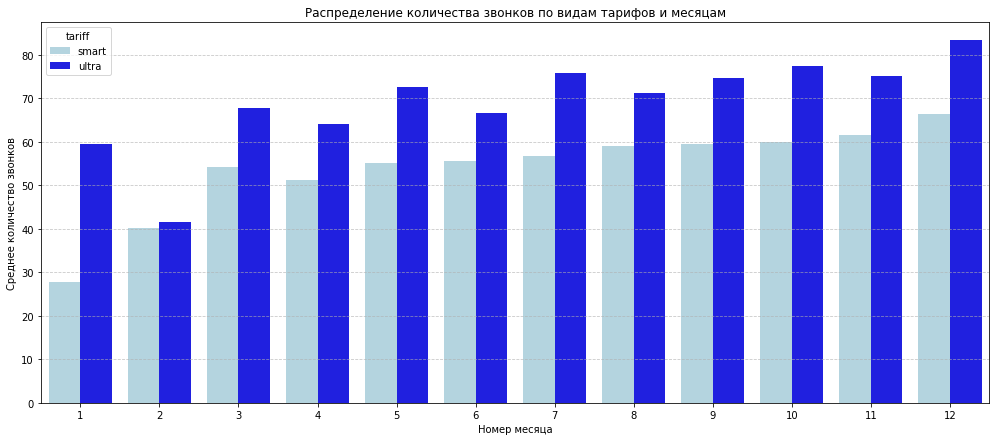

In [129]:
# Увеличиваем размер графика
plt.figure(figsize=(17, 7))

# Создание barplot для распределения среднего количества звонков по месяцам и тарифам
ax = sns.barplot(
    x='month',  # По оси X - месяцы
    y='calls_mean',  # По оси Y - среднее количество звонков
    hue="tariff",  # Разделение по тарифам
    data=stats_df,  # Данные из сводной таблицы
    palette=['lightblue', 'blue']  # Палитра цветов для тарифов
)

# Добавляем сетку на график
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Настройка заголовка и подписей к осям
ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков')

plt.show()

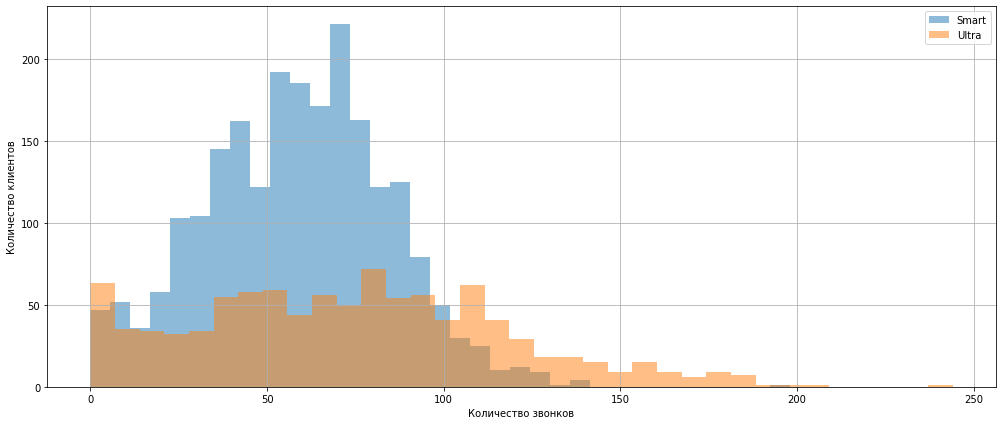

In [130]:
# Группируем данные по тарифам и строим гистограмму для количества звонков
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5, grid=True, figsize=(17, 7))

# Добавляем легенду для отображения тарифов
plt.legend(['Smart', 'Ultra'])

# Настройка подписей к осям
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')

# Отображаем график
plt.show()

Распределение средней продолжительности звонков по видам тарифов и месяцам

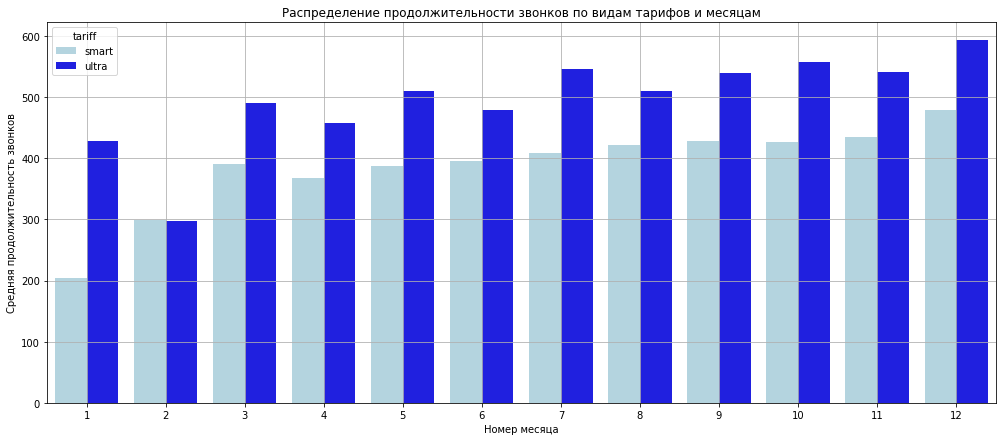

In [131]:
# Увеличиваем размер графика
plt.figure(figsize=(17, 7))

# Используем seaborn для построения барплота средней продолжительности звонков по месяцам и тарифам
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

# Устанавливаем заголовок графика
ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')

# Задаем подписи к осям
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков')

# Добавляем сетку
ax.grid(True)

# Отображаем график
plt.show()


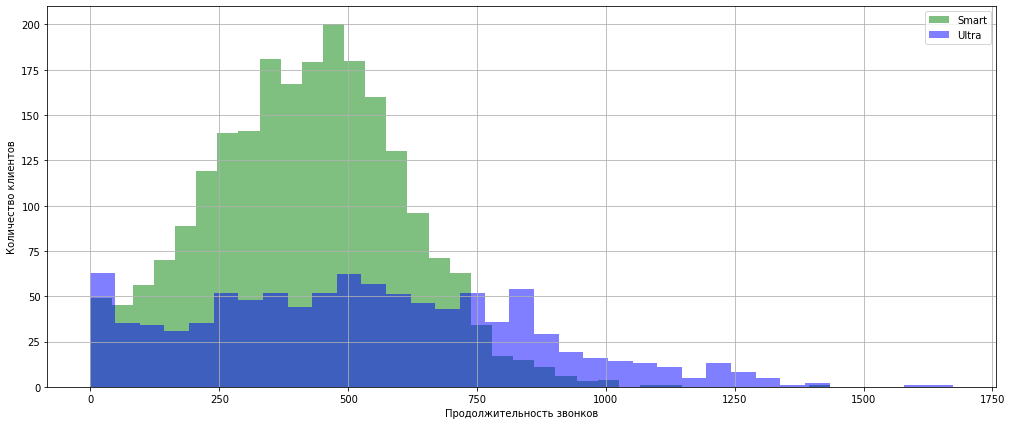

In [132]:
# Увеличиваем размер графика
plt.figure(figsize=(17, 7))

# Используем библиотеку Matplotlib для построения гистограммы продолжительности звонков для пользователей тарифа "Смарт" (зеленая) и "Ультра" (синяя)
user_behavior[user_behavior['tariff'] == 'smart']['minutes'].hist(bins=35, alpha=0.5, color='green', label='Smart')
user_behavior[user_behavior['tariff'] == 'ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue', label='Ultra')

# Добавляем легенду, чтобы отличить тарифы
plt.legend(['Smart', 'Ultra'])

# Задаем подписи к осям
plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество клиентов')

# Добавляем сетку
plt.grid(True)

# Отображаем гистограмму
plt.show()


Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Распределение среднего количества сообщений по видам тарифов и месяцам

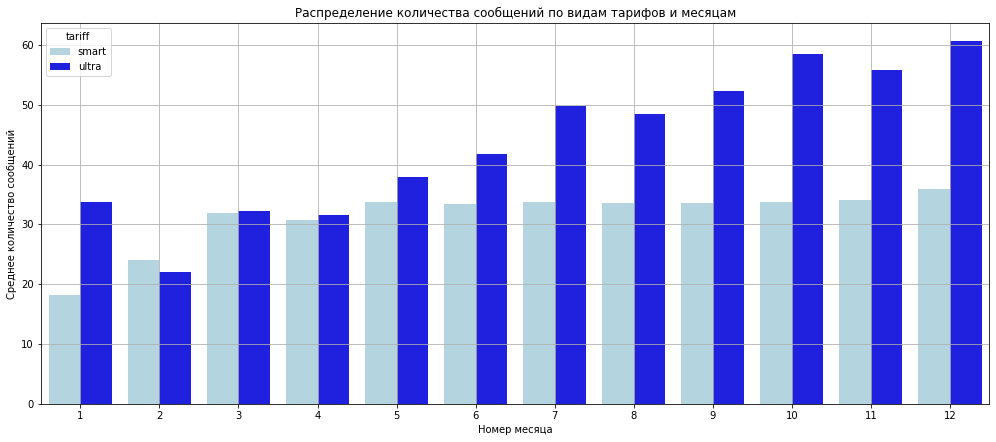

In [133]:
# Увеличиваем размер графика
plt.figure(figsize=(17, 7))

ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()

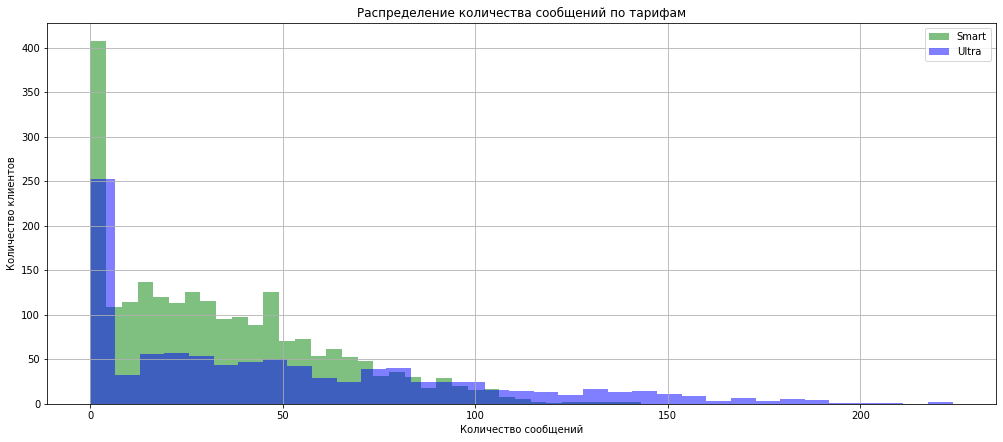

In [134]:
# Увеличиваем размер графика
plt.figure(figsize=(17, 7))

# Создаем гистограмму для пользователей с тарифом "Smart" и "Ultra" по количеству сообщений
user_behavior[user_behavior['tariff'] == 'smart']['messages'].hist(bins=35, alpha=0.5, color='green', label='Smart')
user_behavior[user_behavior['tariff'] == 'ultra']['messages'].hist(bins=35, alpha=0.5, color='blue', label='Ultra')

# Добавляем легенду для отображения тарифов
plt.legend()

# Устанавливаем подписи осей и заголовок
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества сообщений по тарифам')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()

В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

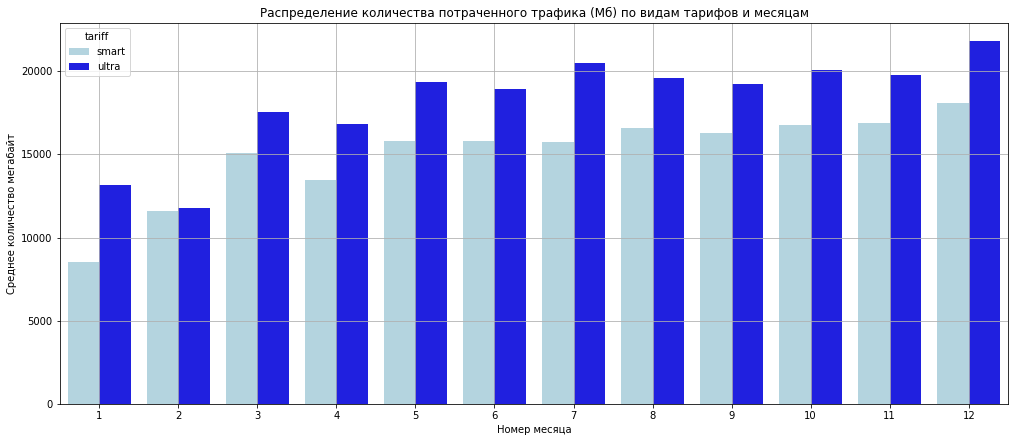

In [135]:
# Увеличиваем размер графика
plt.figure(figsize=(17, 7))

# Создаем barplot для среднего количества потраченного трафика (Мб) по тарифам и месяцам
ax = sns.barplot(x='month', y='sessions_mean', hue='tariff', data=stats_df, palette=['lightblue', 'blue'])

# Устанавливаем заголовок и подписи осей
ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт')

# Добавляем сетку
ax.grid(True)

# Отображаем график
plt.show()

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

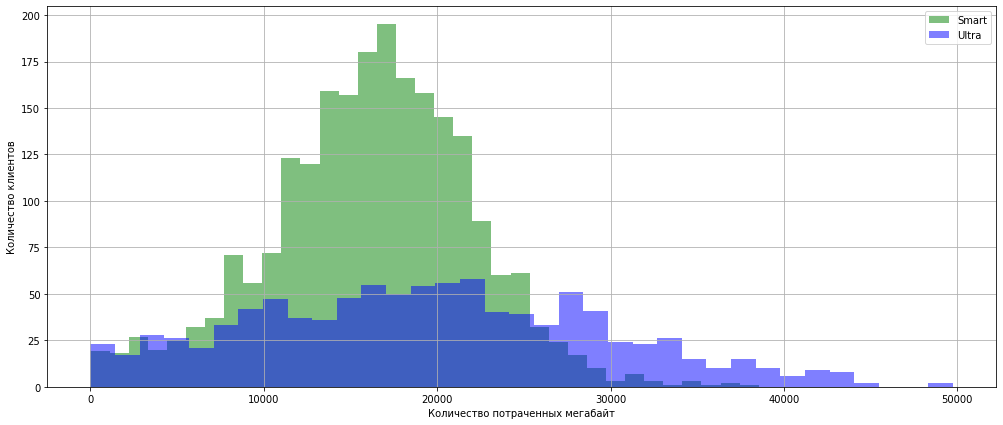

In [136]:
# Увеличиваем размер графика
plt.figure(figsize=(17, 7))

# Создаем гистограмму для количества потраченных мегабайт по тарифу "Смарт"
user_behavior[user_behavior['tariff'] == 'smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')

# Создаем гистограмму для количества потраченных мегабайт по тарифу "Ультра"
user_behavior[user_behavior['tariff'] == 'ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')

# Добавляем легенду для обозначения тарифов
plt.legend(['Smart', 'Ultra'])

# Устанавливаем подписи осей
plt.xlabel('Количество потраченных мегабайт')
plt.ylabel('Количество клиентов')

# Добавляем сетку на график
plt.grid(True)

# Отображаем график
plt.show()

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 ГБ.

### Проверка гипотез

**Задание 28.** Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

In [137]:
# Создаем серию данных для тарифа "Ультра"
tariff_ultra = user_behavior['total_cost'][user_behavior['tariff'] == 'ultra']

# Создаем серию данных для тарифа "Смарт"
tariff_smart = user_behavior['total_cost'][user_behavior['tariff'] == 'smart']

In [138]:
# Выполним t-тест для проверки гипотезы о различии средних двух выборок.
results = st.ttest_ind(tariff_ultra, tariff_smart, equal_var=False)  # Вызываем метод t-теста

alpha = 0.05  # Задаем значение уровня значимости

# Выводим значение p-value на экран
print('p-значение:', results.pvalue)

# Условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Задание 29.** Проверка гипотезы: средняя выручка с пользователей из Москвы отличается от выручки c пользователей других регионов; 

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [139]:
# Создаем две выборки, одна для пользователей из Москвы и другая для пользователей из других городов
total_cost_moscow = user_behavior['total_cost'][user_behavior['city'] =='Москва']
total_cost_no_moscow = user_behavior['total_cost'][user_behavior['city'] !='Москва']

In [140]:
# Выполняем t-тест для сравнения средних значений двух выборок, предполагая неравные дисперсии (equal_var=False)
results = st.ttest_ind(total_cost_moscow, total_cost_no_moscow, equal_var=False)

alpha = 0.05  # Задаем уровень значимости

# Выводим значение p-value на экран
print('p-значение:', results.pvalue)

# Условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу
